# get data

In [1]:
field = 'SWIRE'

#================ get panSTARRS data with lephare info ====================
fname = field + '_lephare.csv'
psdf = pd.read_csv(fname)

#================ get wise data ===========================================
wisedir='../../doc/20170617_Stacking/maps/wisecats/'

f = open(wisedir + field + '.tbl')
wdfname = f.readlines()[14].strip().replace(" ", "").split('|')[1:-1]
f.close()
wsdf = pd.read_csv(wisedir + field + '.tbl', sep = '\s+', skiprows = 18, names = wdfname, low_memory = False)
wsdf = wsdf.drop(wdfname[-2:],axis=1)

# replace null with -999.
wsdf[list(wsdf)[2:]] = wsdf[list(wsdf)[2:]].apply(pd.to_numeric, errors = 'coerce')
wsdf = wsdf.replace(np.nan,-999.)

# convert mag_vega to mag_AB 
# http://wise2.ipac.caltech.edu/docs/release/prelim/expsup/sec4_3g.html#WISEZMA table 5
wsdf['w1mpro'] = wsdf['w1mpro'] + 2.683
wsdf['w2mpro'] = wsdf['w1mpro'] + 3.319
wsdf['w3mpro'] = wsdf['w1mpro'] + 5.242
wsdf['w4mpro'] = wsdf['w1mpro'] + 6.604

In [2]:
wsdf.head()

,ra,dec,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro,ext_flg,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass
0,241.000100,55.581551,20.627,0.127,23.946,0.220,25.869,-999.000,27.231,-999.000,0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
1,241.000226,55.669333,15.206,0.023,18.525,0.022,20.448,0.224,21.810,0.477,0,618896371.0,13.516,0.029,12.914,0.024,12.634,0.031
2,241.000552,55.729619,19.223,0.044,22.542,0.115,24.465,-999.000,25.827,-999.000,0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
3,241.000601,55.660984,20.723,0.139,24.042,-999.000,25.965,-999.000,27.327,-999.000,0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
4,241.000768,55.432188,20.572,0.122,23.891,-999.000,25.814,-999.000,27.176,-999.000,0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000


In [3]:
wsdf.describe()

,ra,dec,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro,ext_flg,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass
count,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,9.918600e+04,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000
mean,242.855811,54.738643,19.671448,-0.106521,22.990448,-176.253814,24.913448,-775.735840,26.275448,-938.332849,0.009326,6.595724e+07,-890.631272,-892.943140,-890.690395,-895.580737,-890.714843,-902.892327
std,1.066865,0.659896,1.272395,13.826671,1.272395,380.999287,1.272395,416.250724,1.272395,238.642547,0.177427,1.979150e+08,313.332287,307.754143,313.161307,304.354084,313.090583,294.595657
min,241.000100,53.600011,6.659000,-999.000000,9.978000,-999.000000,11.901000,-999.000000,13.263000,-999.000000,0.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,241.930105,54.170378,19.096000,0.043000,22.415000,0.041000,24.338000,-999.000000,25.700000,-999.000000,0.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,242.858041,54.731844,19.914000,0.070000,23.233000,0.116000,25.156000,-999.000000,26.518000,-999.000000,0.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,243.781465,55.307697,20.581000,0.117000,23.900000,0.221000,25.823000,-999.000000,27.185000,-999.000000,0.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,244.699994,55.899997,22.402000,0.524000,25.721000,0.543000,27.644000,0.543000,29.006000,0.543000,5.000000,1.020653e+09,18.629000,0.344000,17.866000,0.424000,17.279000,0.487000


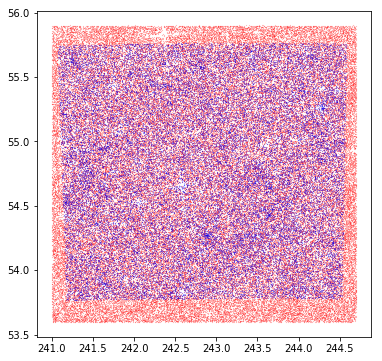

In [4]:
# check the coverage
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.plot(wsdf['ra'],wsdf['dec'],'ro', linestyle='', ms=0.1)
ax.plot(psdf['ra'],psdf['dec'],'bo', linestyle='', ms=0.1)

# match pan-STARRS with WISE

In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

coordws = SkyCoord(ra=wsdf['ra']*u.degree, dec=wsdf['dec']*u.degree,frame='icrs')
coordps = SkyCoord(ra=psdf['ra']*u.degree, dec=psdf['dec']*u.degree, frame='icrs')

idx, d2d,_ = match_coordinates_sky(coordps, coordws)

In [7]:
wsdf_matched = wsdf[list(wsdf)[2:-7]].iloc[idx].reset_index(drop=True)
df = pd.concat([psdf, wsdf_matched],axis = 1)
df['dmatch_arcsec']=d2d.arcsec

del wsdf, psdf

# Write lephare input file with WISE

In [16]:
df_lph = df[['gMeanPSFMag','gMeanPSFMagErr','rMeanPSFMag','rMeanPSFMagErr','iMeanPSFMag','iMeanPSFMagErr',\
          'zMeanPSFMag','zMeanPSFMagErr','yMeanPSFMag','yMeanPSFMagErr', \
        'w1mpro', 'w1sigmpro', 'w2mpro', 'w2sigmpro', 'w3mpro', 'w3sigmpro', 'w4mpro', 'w4sigmpro']].copy()

df_lph['w1sigmpro'].replace([-999], max(df_lph['w1sigmpro']),inplace=True)
df_lph['w2sigmpro'].replace([-999], max(df_lph['w2sigmpro']),inplace=True)
df_lph['w3sigmpro'].replace([-999], max(df_lph['w3sigmpro']),inplace=True)
df_lph['w4sigmpro'].replace([-999], max(df_lph['w4sigmpro']),inplace=True)

df_lph.index += 1

In [19]:
df_lph.head()

,gMeanPSFMag,gMeanPSFMagErr,rMeanPSFMag,rMeanPSFMagErr,iMeanPSFMag,iMeanPSFMagErr,zMeanPSFMag,zMeanPSFMagErr,yMeanPSFMag,yMeanPSFMagErr,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro
1,19.596600,0.018753,19.621901,0.011451,19.757401,0.016486,19.925699,0.009988,19.837900,0.040693,20.428,0.107,23.747,0.200,25.670,0.543,27.032,0.542
2,19.973301,0.028338,19.458401,0.022814,19.261000,0.012609,19.154301,0.021949,19.032101,0.048942,18.460,0.032,21.779,0.060,23.702,0.117,25.064,0.468
3,20.432600,0.019214,19.341200,0.010412,18.842199,0.006674,18.564699,0.006071,18.386499,0.015915,18.754,0.036,22.073,0.069,23.996,0.543,25.358,0.542
4,-999.000000,-999.000000,21.318300,0.036554,19.983700,0.012382,19.332100,0.012739,19.202801,0.059966,19.674,0.062,22.993,0.139,24.916,0.543,26.278,0.542
5,-999.000000,-999.000000,21.685499,0.041999,21.249500,0.039026,20.554399,0.097390,20.049299,0.084169,18.841,0.040,22.160,0.069,24.083,0.174,25.445,0.542


In [20]:
savedir = '~/ciber/lephare/lephare_dev/panstarrs/'
df_lph.to_csv(savedir + 'SWIRE_WISE.in',sep=' ',header=False, float_format='%.3e')

# lephere result process

In [44]:
loaddir = '/Users/ytcheng/ciber/lephare/lephare_dev/panstarrs/'
data = np.loadtxt(loaddir + 'SWIRE_WISE.out')
nband_use = np.array([data[:,12]-2,data[:,12]-3,data[:,12]-3]).T

# star, gal, qso
chi = np.array(data[:,[20,5,17]])
chi = chi / nband_use

# 3 type classification
# 0 - star, 1 - gal, 2 - qso
lph_class3 = np.argmin(chi,axis=1)
# -1 - star, 1 - gal, 2 - qso
lph_class3[lph_class3==0] = -1
# set dof = 0 src to -999
lph_class3[nband_use[:,1]<=0] = -999

# 2 type classification
# 0 - star, 1 - gal
lph_class = np.argmin(chi[:,:2],axis=1)
# -1 - star, 1 - gal
lph_class[lph_class==0] = -1
# set dof = 0 src to 3
lph_class[nband_use[:,1]<=0] = -999


df['wz_gal'] = data[:,1]
df['wz_qso'] = data[:,16]
df['wdof_gal'] = np.array(nband_use[:,1], dtype=int)
df['wchi2_star'] = data[:,20]
df['wchi2_gal'] = data[:,5]
df['wchi2_qso'] = data[:,17]
df['wlphClass3'] = lph_class3
df['wlphClass'] = lph_class

In [73]:
df[['wchi2_star','wchi2_gal','wchi2_qso','wlphClass','chi2_star','chi2_gal','chi2_qso','lphClass']].head()

,wchi2_star,wchi2_gal,wchi2_qso,wlphClass,chi2_star,chi2_gal,chi2_qso,lphClass
0,175.205,2035.670,404.222,-1,21.02900,41.485000,154.719000,-1
1,1069.010,2022.840,475.561,-1,5.74502,0.624177,1.232070,1
2,1194.960,12069.000,1202.650,-1,26.76590,4.775810,25.354800,1
3,391.186,4664.180,569.135,-1,14.20090,13.030100,0.989434,-1
4,662.027,717.402,323.024,-1,21.93150,0.061602,0.695842,1


# Plot results

In [151]:
savedir = '/Users/ytcheng/ciber/doc/20180313_lephare/plots/WISE/'

## d_match examination

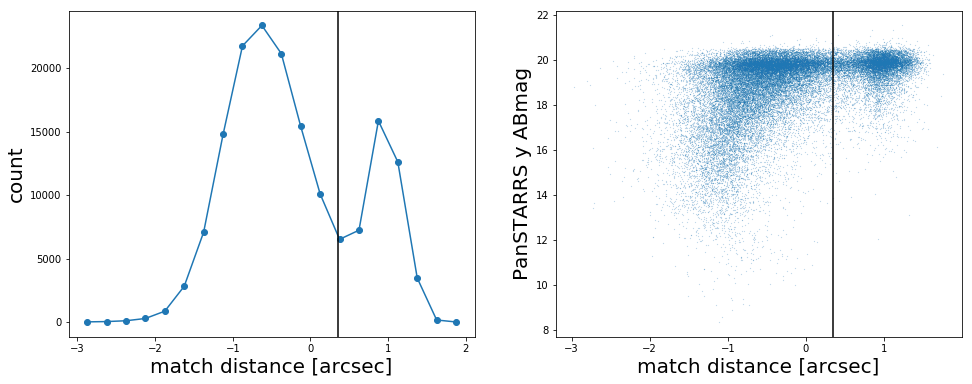

In [152]:
for _ in [0]:
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    
    logdmatch_arr = np.log10(np.array(df['dmatch_arcsec']))
    binedges = np.arange(-3,2.1,0.25)
    bins = (binedges[:-1] + binedges[1:])/2

    hist,_ = np.histogram(logdmatch_arr, bins = binedges)
    ax[0].plot(bins,hist / (binedges[1:]-binedges[:-1]),'o-')
    ax[0].set_xlabel('match distance [arcsec]', fontsize=20)
    ax[0].set_ylabel('count', fontsize=20)
    ax[0].axvline(0.35, c='k')
    
    ax[1].plot(logdmatch_arr, df['yMeanPSFMag'], 'o', ms=0.1)
    ax[1].set_xlabel('match distance [arcsec]', fontsize=20)
    ax[1].set_ylabel('PanSTARRS y ABmag', fontsize=20)
    ax[1].axvline(0.35, c='k')
    
    fig.savefig(savedir + field + '_dmatch', dpi = 256, bbox_inches='tight')

## color-color diagram

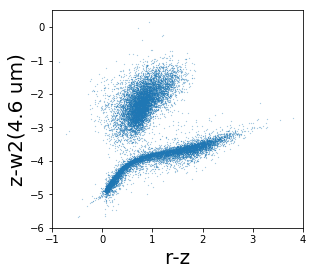

In [183]:
for _ in [0]:
    fig = plt.figure(figsize=(4.5,4))
    b1_arr = np.array(df['rMeanPSFMag'])
    b2_arr = np.array(df['zMeanPSFMag'])
    w_arr = np.array(df['w2mpro'])
    dmatch_arr = np.array(df['dmatch_arcsec'])
    dbcls_arr=np.ones(len(b1_arr)) * -999.

    idx = np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35))[0]
    c1_arr = b1_arr[idx] - b2_arr[idx]
    c2_arr = b2_arr[idx] - w_arr[idx]
    plt.plot(c1_arr,c2_arr,'.',ms=0.3)
    plt.xlabel('r-z', fontsize=20)
    plt.ylabel('z-w2(4.6 um)', fontsize=20)
    plt.xlim([-1,4])
    plt.ylim([-6,0.5])
    
    fig.savefig(savedir + field + '_colorcolor', dpi = 256, bbox_inches='tight')

In [178]:
savedir

'/Users/ytcheng/ciber/doc/20180313_lephare/plots/WISE/'

## DBSCAN clustering on color-color diagram

(Density-based spatial clustering of applications with noise)

[-1  0  1]


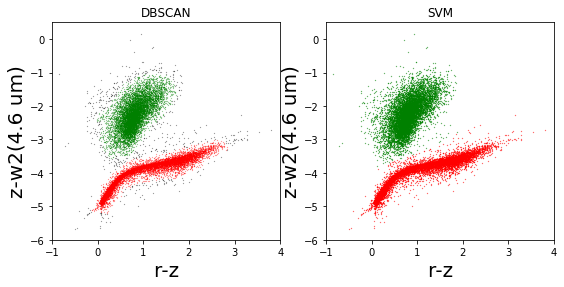

In [173]:
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC

for _ in [0]:
    fig, ax = plt.subplots(1,2,figsize=(9,4))
    
    b1_arr = np.array(df['rMeanPSFMag'])
    b2_arr = np.array(df['zMeanPSFMag'])
    w_arr = np.array(df['w2mpro'])
    dmatch_arr = np.array(df['dmatch_arcsec'])
    dbcls_arr=np.ones(len(b1_arr)) * -999.

    idx = np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35))[0]
    c1_arr = b1_arr[idx] - b2_arr[idx]
    c2_arr = b2_arr[idx] - w_arr[idx]
    X = np.array([c1_arr,c2_arr]).T

    # DBSCAN clustering
    db = DBSCAN(eps=0.1, min_samples=20).fit(X)
    Y = np.array(db.labels_)
    print(np.unique(Y))
    
    ax[0].plot(c1_arr[Y==0],c2_arr[Y==0],'g.',ms=0.3)
    ax[0].plot(c1_arr[Y==1],c2_arr[Y==1],'r.',ms=0.3)
    ax[0].plot(c1_arr[Y==-1],c2_arr[Y==-1],'k.',ms=0.3)
    ax[0].set_xlim([-1,4])
    ax[0].set_ylim([-6,0.5])
    ax[0].set_title('DBSCAN')
    ax[0].set_xlabel('r-z', fontsize=20)
    ax[0].set_ylabel('z-w2(4.6 um)', fontsize=20)
    
    # SVM 
    clf = SVC()
    clf.fit(X[(Y==0) | (Y==1),:], Y[(Y==0) | (Y==1)])
    Ysvm = clf.predict(X)
    ax[1].plot(c1_arr[Ysvm==0],c2_arr[Ysvm==0],'g.',ms=0.5)
    ax[1].plot(c1_arr[Ysvm==1],c2_arr[Ysvm==1],'r.',ms=0.5)
    ax[1].set_xlim([-1,4])
    ax[1].set_ylim([-6,0.5])
    ax[1].set_title('SVM')
    ax[1].set_xlabel('r-z', fontsize=20)
    ax[1].set_ylabel('z-w2(4.6 um)', fontsize=20)
    
    # write classification to df
    cls_arr=np.zeros(len(Y))
    cls_arr[Ysvm==1] = -1 # stars
    cls_arr[Ysvm==0] = 1 # gals

    dbcls_arr[idx] = cls_arr
    df['dbscanClass'] = dbcls_arr
    
    fig.savefig(savedir + field + '_MLclass', dpi = 256, bbox_inches='tight')

## color-color diagram summary

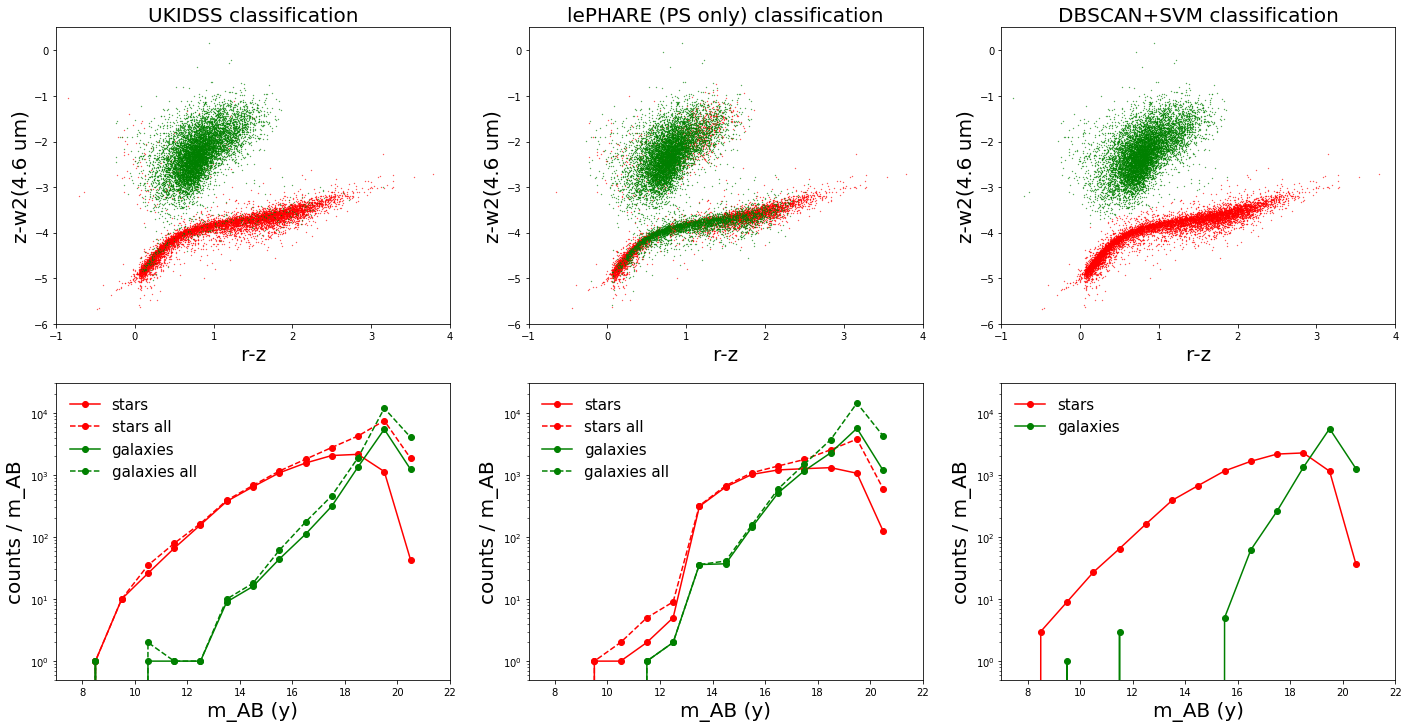

In [176]:
for _ in [0]:
    fig, ax = plt.subplots(2,3,figsize=(24,12))

    g_arr = np.array(df['gMeanPSFMag'])
    r_arr = np.array(df['rMeanPSFMag'])
    i_arr = np.array(df['iMeanPSFMag'])
    z_arr = np.array(df['zMeanPSFMag'])
    y_arr = np.array(df['yMeanPSFMag'])
    w_arr = np.array(df['w2mpro'])
    dmatch_arr = np.array(df['dmatch_arcsec'])
    ukcls_arr = np.array(df['mergedClass'])
    lphcls_arr = np.array(df['lphClass'])
    dbcls_arr= np.array(df['dbscanClass'])
    b1_arr = r_arr
    b2_arr = z_arr
    
    idxs = np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (ukcls_arr==-1))[0]
    idxg = np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (ukcls_arr==1))[0]    
    ax[0][0].plot(b1_arr[idxs]-b2_arr[idxs], b2_arr[idxs] - w_arr[idxs], 'ro', ms=0.3)
    ax[0][0].plot(b1_arr[idxg]-b2_arr[idxg], b2_arr[idxg] - w_arr[idxg], 'go', ms=0.3)
    ax[0][0].set_xlabel('r-z', fontsize=20)
    ax[0][0].set_ylabel('z-w2(4.6 um)', fontsize=20)
    ax[0][0].set_title('UKIDSS classification', fontsize=20)
    ax[0][0].set_xlim([-1,4])
    ax[0][0].set_ylim([-6,0.5])
    
    binedges = np.arange(7,22,1)
    bins = (binedges[:-1] + binedges[1:])/2
    shist,_ = np.histogram(y_arr[idxs], bins = binedges)
    shistall,_ = np.histogram(y_arr[(ukcls_arr==-1)], bins = binedges)
    ax[1][0].plot(bins,shist / (binedges[1]-binedges[0]),'ro-',label='stars')
    ax[1][0].plot(bins,shistall / (binedges[1]-binedges[0]),'ro--',label='stars all')
    ghist,_ = np.histogram(y_arr[idxg], bins = binedges)
    ghistall,_ = np.histogram(y_arr[(ukcls_arr==1)], bins = binedges)
    ax[1][0].plot(bins,ghist / (binedges[1]-binedges[0]),'go-',label='galaxies')
    ax[1][0].plot(bins,ghistall / (binedges[1]-binedges[0]),'go--',label='galaxies all')
    ax[1][0].set_yscale('log')
    ax[1][0].set_xlabel('m_AB (y)',fontsize=20)
    ax[1][0].set_ylabel('counts / m_AB',fontsize=20)
    ax[1][0].legend(loc=0, frameon = False,fontsize=15)
    ax[1][0].set_xlim([7,22])
    ax[1][0].set_ylim([5e-1,3e4])

    idxs=np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (lphcls_arr==-1))[0]
    idxg=np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (lphcls_arr==1))[0]    
    ax[0][1].plot(b1_arr[idxs]-b2_arr[idxs], b2_arr[idxs] - w_arr[idxs], 'ro', ms=0.3)
    ax[0][1].plot(b1_arr[idxg]-b2_arr[idxg], b2_arr[idxg] - w_arr[idxg], 'go', ms=0.3)
    ax[0][1].set_xlabel('r-z', fontsize=20)
    ax[0][1].set_ylabel('z-w2(4.6 um)', fontsize=20)
    ax[0][1].set_title('lePHARE (PS only) classification', fontsize=20)
    ax[0][1].set_xlim([-1,4])
    ax[0][1].set_ylim([-6,0.5])

    binedges = np.arange(7,22,1)
    bins = (binedges[:-1] + binedges[1:])/2
    shist,_ = np.histogram(y_arr[idxs], bins = binedges)
    shistall,_ = np.histogram(y_arr[(lphcls_arr==-1)], bins = binedges)
    ax[1][1].plot(bins,shist / (binedges[1]-binedges[0]),'ro-',label='stars')
    ax[1][1].plot(bins,shistall / (binedges[1]-binedges[0]),'ro--',label='stars all')
    ghist,_ = np.histogram(y_arr[idxg], bins = binedges)
    ghistall,_ = np.histogram(y_arr[(lphcls_arr==1)], bins = binedges)
    ax[1][1].plot(bins,ghist / (binedges[1]-binedges[0]),'go-',label='galaxies')
    ax[1][1].plot(bins,ghistall / (binedges[1]-binedges[0]),'go--',label='galaxies all')
    ax[1][1].set_yscale('log')
    ax[1][1].set_xlabel('m_AB (y)',fontsize=20)
    ax[1][1].set_ylabel('counts / m_AB',fontsize=20)
    ax[1][1].legend(loc=0, frameon = False,fontsize=15)
    ax[1][1].set_xlim([7,22])
    ax[1][1].set_ylim([5e-1,3e4])
    
    idxs=np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (dbcls_arr==-1))[0]
    idxg=np.where((b1_arr>-990) & (b2_arr>-990) & (w_arr>-990) & (dmatch_arr<0.35) & (dbcls_arr==1))[0]
    ax[0][2].plot(b1_arr[idxs]-b2_arr[idxs], b2_arr[idxs] - w_arr[idxs], 'ro', ms=0.3)
    ax[0][2].plot(b1_arr[idxg]-b2_arr[idxg], b2_arr[idxg] - w_arr[idxg], 'go', ms=0.3)
    ax[0][2].set_xlabel('r-z', fontsize=20)
    ax[0][2].set_ylabel('z-w2(4.6 um)', fontsize=20)
    ax[0][2].set_title('DBSCAN+SVM classification', fontsize=20)
    ax[0][2].set_xlim([-1,4])
    ax[0][2].set_ylim([-6,0.5])

    binedges = np.arange(7,22,1)
    bins = (binedges[:-1] + binedges[1:])/2
    shist,_ = np.histogram(y_arr[idxs], bins = binedges)
    ax[1][2].plot(bins,shist / (binedges[1]-binedges[0]),'ro-',label='stars')
    ghist,_ = np.histogram(y_arr[idxg], bins = binedges)
    ax[1][2].plot(bins,ghist / (binedges[1]-binedges[0]),'go-',label='galaxies')
    ax[1][2].set_yscale('log')
    ax[1][2].set_xlabel('m_AB (y)',fontsize=20)
    ax[1][2].set_ylabel('counts / m_AB',fontsize=20)
    ax[1][2].legend(loc=0, frameon = False,fontsize=15)
    ax[1][2].set_xlim([7,22])
    ax[1][2].set_ylim([5e-1,3e4])
    
    fig.savefig(savedir + field + '_colorcolorcls', dpi = 256, bbox_inches='tight')

In [46]:
df.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanPSFMagErr,...,ext_flg,dmatch_arcsec,wz_gal,wz_qso,wdof_gal,wchi2_star,wchi2_gal,wchi2_qso,wlphClass3,wlphClass
0,241.850863,53.779051,1020.821047,816.781055,19.596600,19.621901,19.757401,19.925699,19.837900,0.018753,...,0,13.917315,0.04,0.04,6,175.205,2035.670,404.222,-1,-1
1,241.978114,53.781721,1020.149568,777.847193,19.973301,19.458401,19.261000,19.154301,19.032101,0.028338,...,0,0.207288,0.00,1.92,6,1069.010,2022.840,475.561,2,-1
2,241.996467,53.781784,1020.212717,772.237430,20.432600,19.341200,18.842199,18.564699,18.386499,0.019214,...,0,0.852351,0.00,1.40,6,1194.960,12069.000,1202.650,-1,-1
3,241.199316,53.767101,1022.152968,1016.453943,-999.000000,21.318300,19.983700,19.332100,19.202801,-999.000000,...,0,0.217556,0.04,1.56,5,391.186,4664.180,569.135,-1,-1
4,241.294344,53.774071,1019.379924,987.202994,-999.000000,21.685499,21.249500,20.554399,20.049299,-999.000000,...,0,4.368605,0.04,2.16,5,662.027,717.402,323.024,2,-1
